# Introduction
The properties of lunar craters can provide insight into planetary formation, surface dating, and the properties of their incident projectiles (Ivanov et al. 2002). Notably, crater chronometry systems such as isochrons have been particularly useful in dating geological surfaces with size frequency distributions (SFD) of meteor diameters on Mars and the Moon (Hartmann 1999; Williams et al. 2014). 

In this work, we will model the size frequency distribution of lunar craters using Monte Carlo simulations and known asteroid SFDs. We draw upon research from other authors to understand lunar crater SFD (Cross 1966; Ivanov et al. 2002; Wilhelms et al. 1978), impact crater scaling laws based on asteroid properties (Holsapple 1987; Schmidt 1980; Wheeler & Mathias 2019), and apply Monte Carlo simulations to asteroids (Williams et al. 2014). We aim to derive results consistent with the lunar production function and modern crater catalogs. In particular, we will compare our simulated SFDs against the updated, uncertainty-aware lunar production function emerging from Robbins (2018), which leverages a nearly global, ≥1-km crater database to reconcile differences between the Hartmann and Neukum chronologies in the critical 0.5–50 km range (Robbins 2018). 

# Methods



In [109]:
import numpy as np
from random import choices

def r_plot_prediction(diameter_list, coefficient_list):
    asteroid_count_list = []
    for d in diameter_list:
        log_d = np.log10(d)
        log_n = 0
        for i, coeff in enumerate(coefficient_list):
            log_n += coeff * (log_d ** i)
        n = 10 ** log_n
        asteroid_count_list.append(n)
    return asteroid_count_list

def generate_asteroid_population(diameter_list, normalized_asteroid_list, k = 100):
    new_population = choices(diameter_list, weights=normalized_asteroid_list, k=k)

    return new_population

def calculate_volume(simulated_asteroid_diameters_list):
    volume_list = []
    for d in simulated_asteroid_diameters_list:
        r = d / 2
        volume = (4/3) * np.pi * (r ** 3)
        volume_list.append(volume)
    return volume_list

def calculate_mass(volume_list):
    density = 2.7e12  # in kg/km^3
    mass_list = []
    for volume in volume_list:
        mass = density * volume
        mass_list.append(mass)
    return mass_list

def monte_carlo_simulation(diameter_list, normalized_asteroid_count_list, runs = 1000, k = 100):
    total_mass_list = []
    total_diameter_list = []
    total_volume_list = []
    for _ in range(runs):
        # get average volume, and diameters
        simulated_asteroid_diameters_list = generate_asteroid_population(diameter_list, normalized_asteroid_count_list, k)
        volume_list = calculate_volume(simulated_asteroid_diameters_list)
        mass_list = calculate_mass(volume_list)

        total_mass_list.append(mass_list)
        total_diameter_list.append(simulated_asteroid_diameters_list)
        total_volume_list.append(volume_list)

    return total_mass_list, total_diameter_list, total_volume_list 

def create_log_histogram(data, title, xlabel, ax):
    # Filter for positive values, as log scale cannot handle non-positives
    data_positive = data[data > 0]
    
    if len(data_positive) == 0:
        ax.set_title(title)
        ax.text(0.5, 0.5, "No positive data to plot.", transform=ax.transAxes, ha='center')
        return

    # Determine the range in log space
    min_val = data_positive.min()
    max_val = data_positive.max()
    
    # Create logarithmically spaced bins (100 bins for resolution)
    bins = np.logspace(np.log10(min_val), np.log10(max_val), 100)
    
    # Plot the histogram
    # Density=False plots the raw count (frequency)
    ax.hist(data_positive, bins=bins, color='skyblue', edgecolor='black', alpha=0.7)
    
    # Set log scale for x-axis
    ax.set_xscale('log')
    
    # Set labels and title
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Frequency (Count)")
    ax.grid(True, which="both", ls="--", linewidth=0.5, alpha=0.6)


0.9515463958851873


Text(0, 0.5, 'Frequency of Asteroid Count')

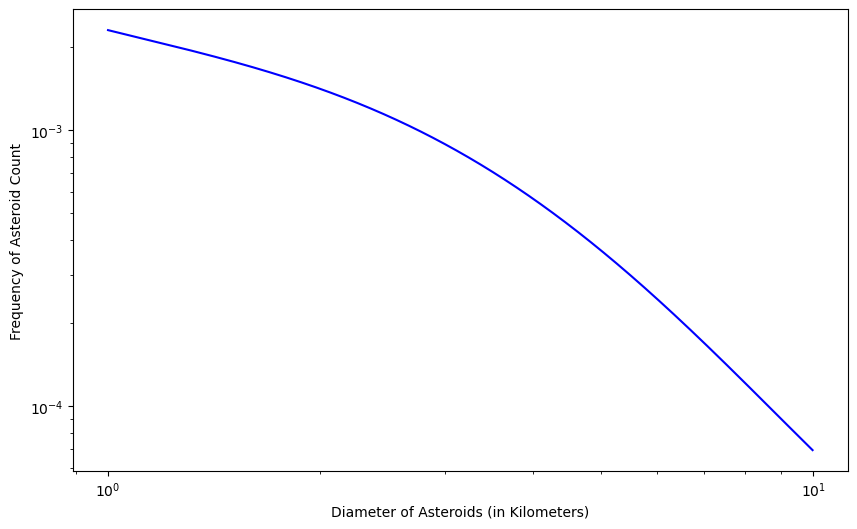

In [110]:
# plot data of diameter against asteroid count

import matplotlib.pyplot as plt


# create initial lists
bin_count = 1000
min_diameter = 1
max_diameeter = 10
diameter_list = np.logspace(np.log10(min_diameter), np.log10(max_diameeter), num=bin_count )
coefficient_list = [0,1.375, 0.1272, -1.2821, -0.3075, 0.4148, 0.1911, -0.04261, -3.1802e-3, 2.799e-3, 6.892e-4, 2.614e-6, -1.416e-6, -1.191e-6]

# get the list of relative plots
r_list = r_plot_prediction(diameter_list=diameter_list, coefficient_list=coefficient_list)
diff_diameter = np.diff(diameter_list)

diameter_list, r_list = diameter_list[:-1], r_list[:-1]

asteroid_count_list = r_list * diff_diameter * (diameter_list ** -3)

print(sum(asteroid_count_list))


# plot diameter against asteroid count list
plt.figure(figsize=(10, 6))
plt.loglog(diameter_list, asteroid_count_list, label='Asteroid Count Prediction', color='blue')
plt.xlabel("Diameter of Asteroids (in Kilometers)")
plt.ylabel("Frequency of Asteroid Count")

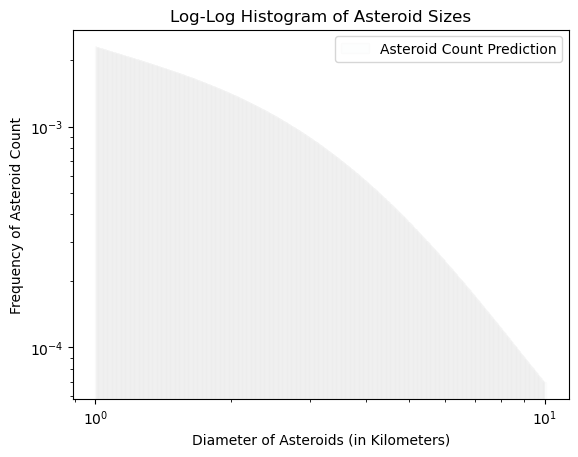

In [111]:
from matplotlib import pyplot as plt
plt.bar(diameter_list, asteroid_count_list, width=np.diff(np.append(diameter_list, diameter_list[-1]*1.01)), 
        align='edge', edgecolor='k', color='skyblue', alpha=0.01, label='Asteroid Count Prediction')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Diameter of Asteroids (in Kilometers)")
plt.ylabel("Frequency of Asteroid Count")
plt.title("Log-Log Histogram of Asteroid Sizes")
plt.legend()
plt.show()

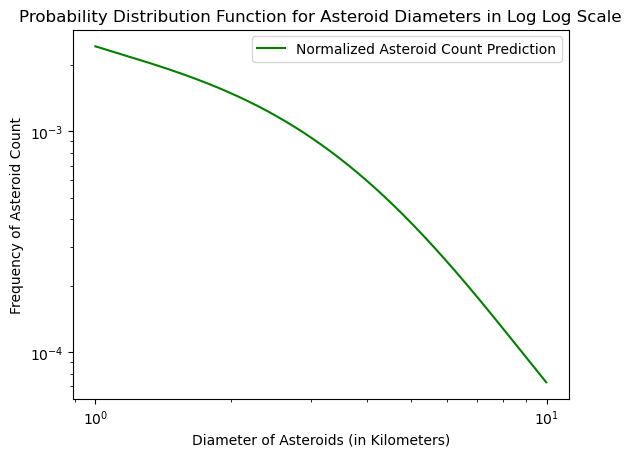

0.0024250507319915106

In [112]:
normalized_asteroid_count_list = asteroid_count_list / sum(asteroid_count_list)

from matplotlib import pyplot as plt
# plt.bar(diameter_list, normalized_asteroid_count_list, width=np.diff(np.append(diameter_list, diameter_list[-1]*1.01)), 
#         align='edge', edgecolor='k', color='skyblue', alpha=0.01, label='Asteroid Count Prediction')
plt.plot(diameter_list, normalized_asteroid_count_list, label='Normalized Asteroid Count Prediction', color='green')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Diameter of Asteroids (in Kilometers)")
plt.ylabel("Frequency of Asteroid Count")
plt.title("Probability Distribution Function for Asteroid Diameters in Log Log Scale")
plt.legend()
plt.show()

max(normalized_asteroid_count_list)

(array([382., 257., 277., ...,   0.,   0.,   4.]),
 array([1.41371669e+12, 1.55204458e+12, 1.69037247e+12, ...,
        1.38441596e+15, 1.38455429e+15, 1.38469262e+15]),
 <BarContainer object of 10000 artists>)

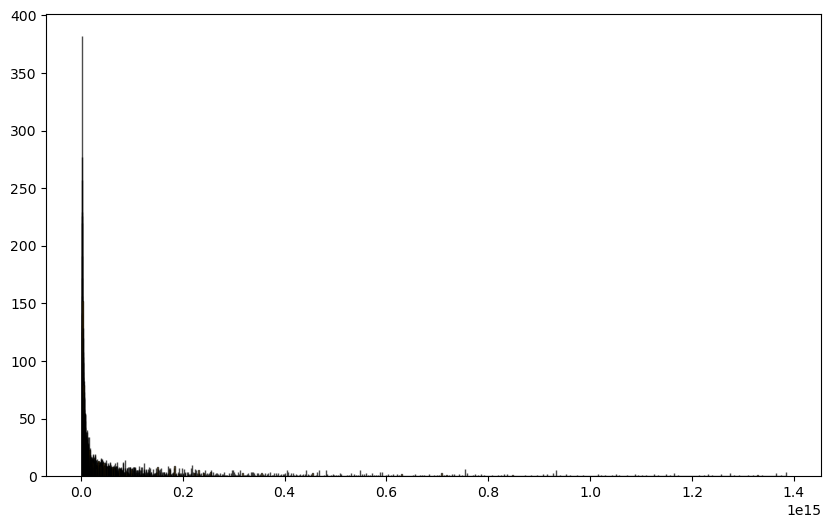

In [113]:
simulated_asteroid_diameters = generate_asteroid_population(diameter_list=diameter_list, normalized_asteroid_list=normalized_asteroid_count_list, k = 10000)
simulated_asteroid_volumes = calculate_volume(simulated_asteroid_diameters)
simulated_asteroid_masses = calculate_mass(simulated_asteroid_volumes)
# # create a plot of the histogram of the simulated asteroid diameters
plt.figure(figsize=(10, 6))
plt.hist(simulated_asteroid_masses, bins=10000, edgecolor='k', color='orange', alpha=0.7)

In [114]:
total_mass_list, total_diameter_list, total_volume_list = monte_carlo_simulation(diameter_list, normalized_asteroid_count_list, runs = 1000, k = 100000)

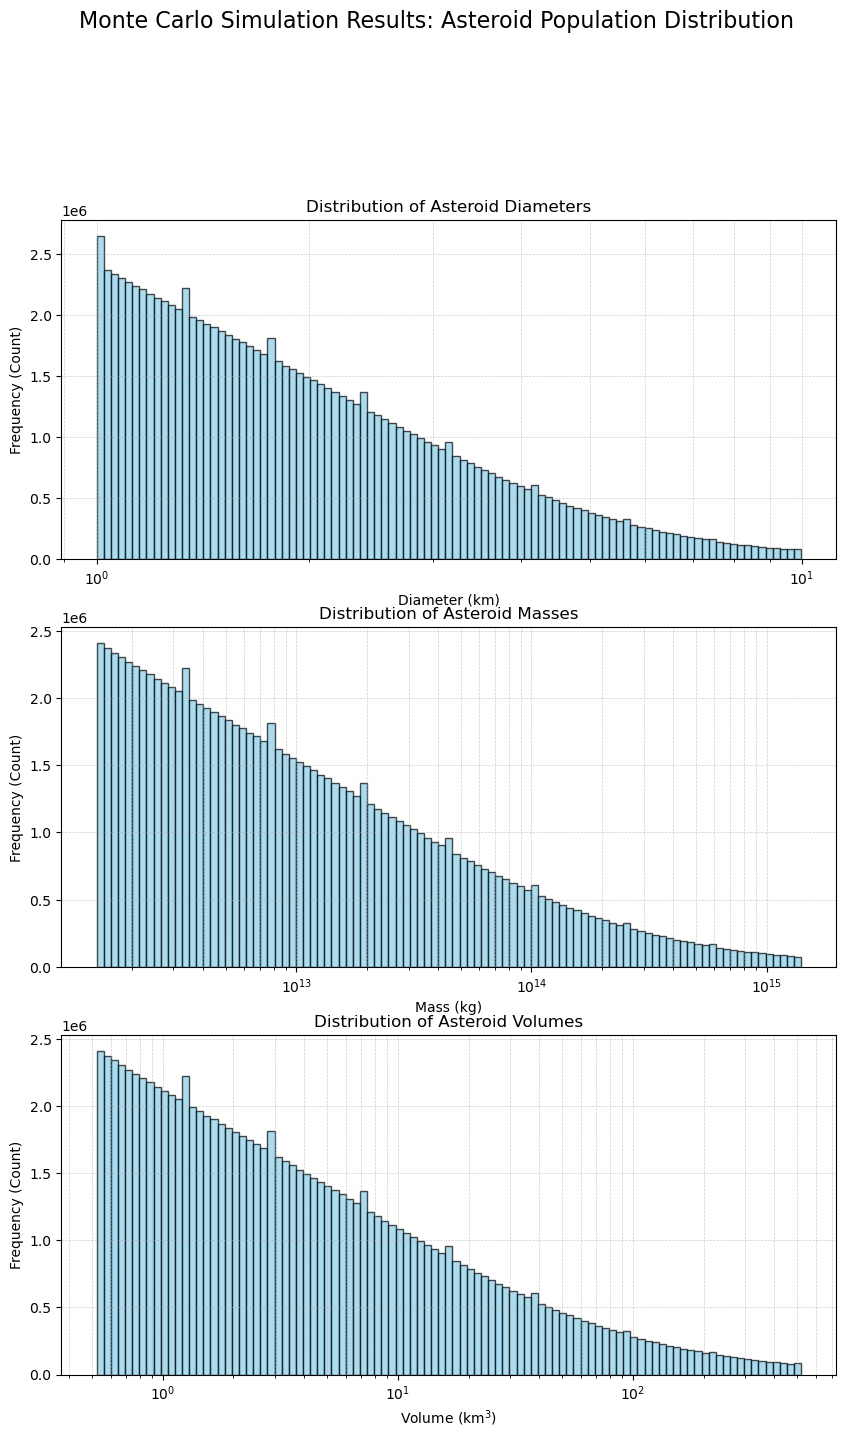

In [115]:
total_diameter_list = np.array(total_diameter_list)
total_mass_list = np.array(total_mass_list)
total_volume_list = np.array(total_volume_list)

fig, axes = plt.subplots(3, 1, figsize=(10, 15))
plt.suptitle('Monte Carlo Simulation Results: Asteroid Population Distribution', 
             fontsize=16, y=1.02)

create_log_histogram(
    total_diameter_list, 
    'Distribution of Asteroid Diameters', 
    'Diameter (km)', 
    axes[0]
)

# 2. Mass Histogram
create_log_histogram(
    total_mass_list, 
    'Distribution of Asteroid Masses', 
    'Mass (kg)', 
    axes[1]
)

# 3. Volume Histogram
create_log_histogram(
    total_volume_list, 
    'Distribution of Asteroid Volumes', 
    'Volume ($\mathrm{km}^3$)', 
    axes[2]
)